In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.bandits import Bandit

In [2]:
# matplotlib styles
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 14)

In [3]:
# function for bandit simulations
def simulate_bandits(bandits, epochs, episodes):
    # dictionary for rewards and best actions
    history = {}

    # evaluate bandits
    for policy, bandit in bandits.items():
        rewards, best_actions = bandit.evaluate(epochs = epochs, episodes = episodes)
        history.update({
            policy : {
                'rewards' : rewards,
                'best_actions' : best_actions
            }
        })
    
    return history

In [4]:
# function for plotting reward history of bandit simulation
def plot_bandits(history):
    fig, (ax1, ax2) = plt.subplots(2, 1)
    
    for policy, values in history.items():
        ax1.plot(values['rewards'], label = policy)

    ax1.set(xlabel = 'Episodes', ylabel = 'Avg. Reward')
    ax1.legend(loc = 'best')
    
    for policy, values in history.items():
        ax2.plot(values['best_actions'], label = policy)

    ax2.set(xlabel = 'Episodes', ylabel = '% Optimal Action')
    ax2.legend(loc = 'best')
    
    plt.show(fig);

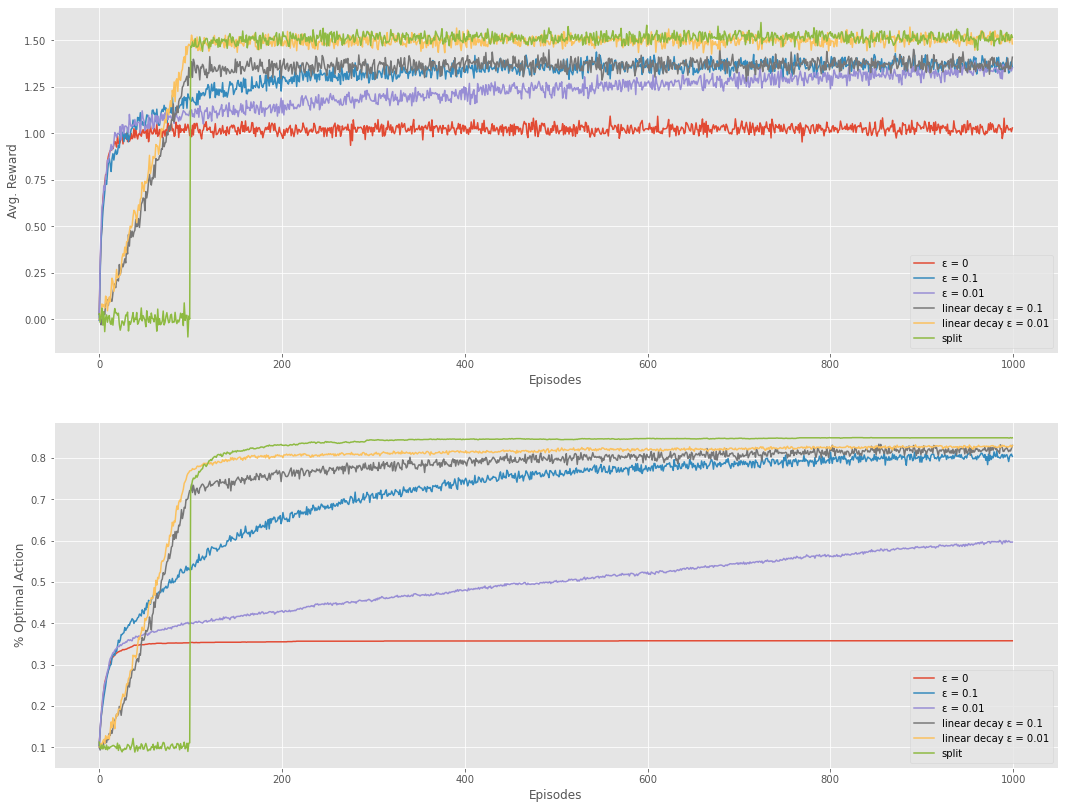

CPU times: user 16min 55s, sys: 9.55 s, total: 17min 5s
Wall time: 17min 8s


In [5]:
%%time

# stationary
bandits = {
    '\u03B5 = 0' : Bandit(),
    '\u03B5 = 0.1' : Bandit(epsilon = 0.1),
    '\u03B5 = 0.01' : Bandit(epsilon = 0.01),
    'linear decay \u03B5 = 0.1' : Bandit(epsilon = 0.1, linear_decay = True),
    'linear decay \u03B5 = 0.01' : Bandit(epsilon = 0.01, linear_decay = True),
    'split' : Bandit(split = True)
}

# run simulation
history = simulate_bandits(bandits, epochs = 2000, episodes = 1000)

# plot rewards
plot_bandits(history)

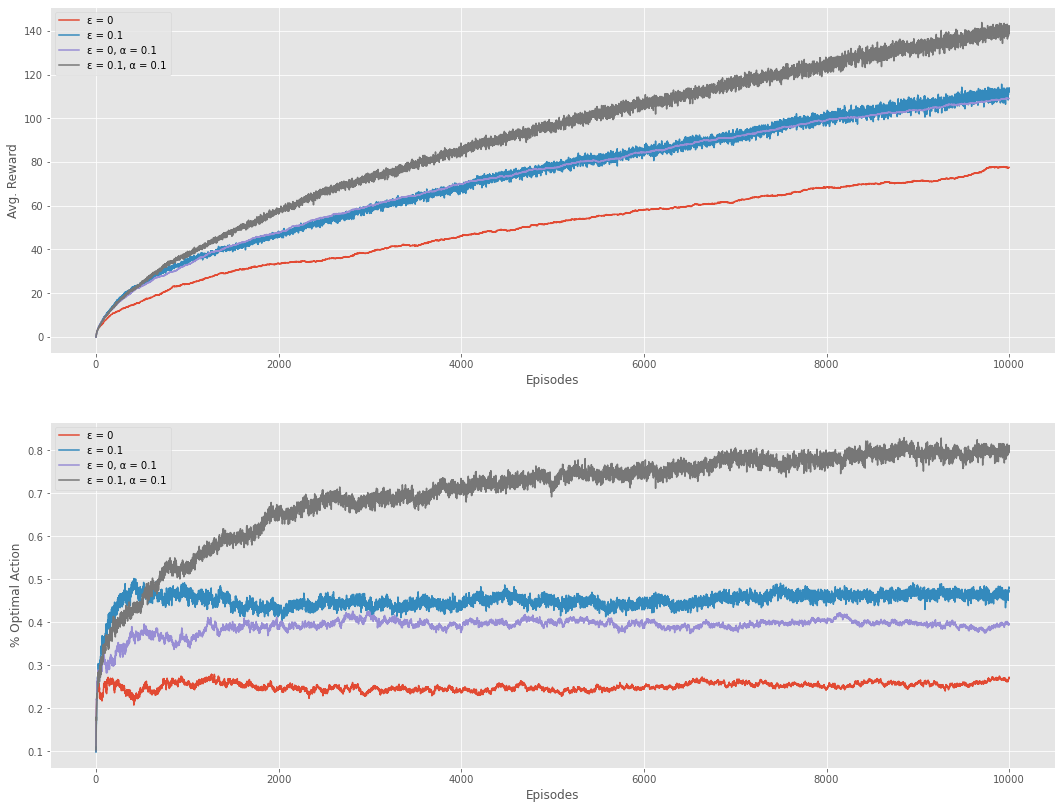

CPU times: user 50min 2s, sys: 8.53 s, total: 50min 11s
Wall time: 50min 8s


In [6]:
%%time

# non-stationary
bandits = {
    '\u03B5 = 0' : Bandit(stationary = False),
    '\u03B5 = 0.1' : Bandit(epsilon = 0.1, stationary = False),
    '\u03B5 = 0, \u03B1 = 0.1' : Bandit(stationary = False, sample_averages = False, alpha = 0.1),
    '\u03B5 = 0.1, \u03B1 = 0.1' : Bandit(epsilon = 0.1, stationary = False, sample_averages = False, alpha = 0.1),
}

# run simulation
history = simulate_bandits(bandits, epochs = 1000, episodes = 10000)

# plot rewards
plot_bandits(history)

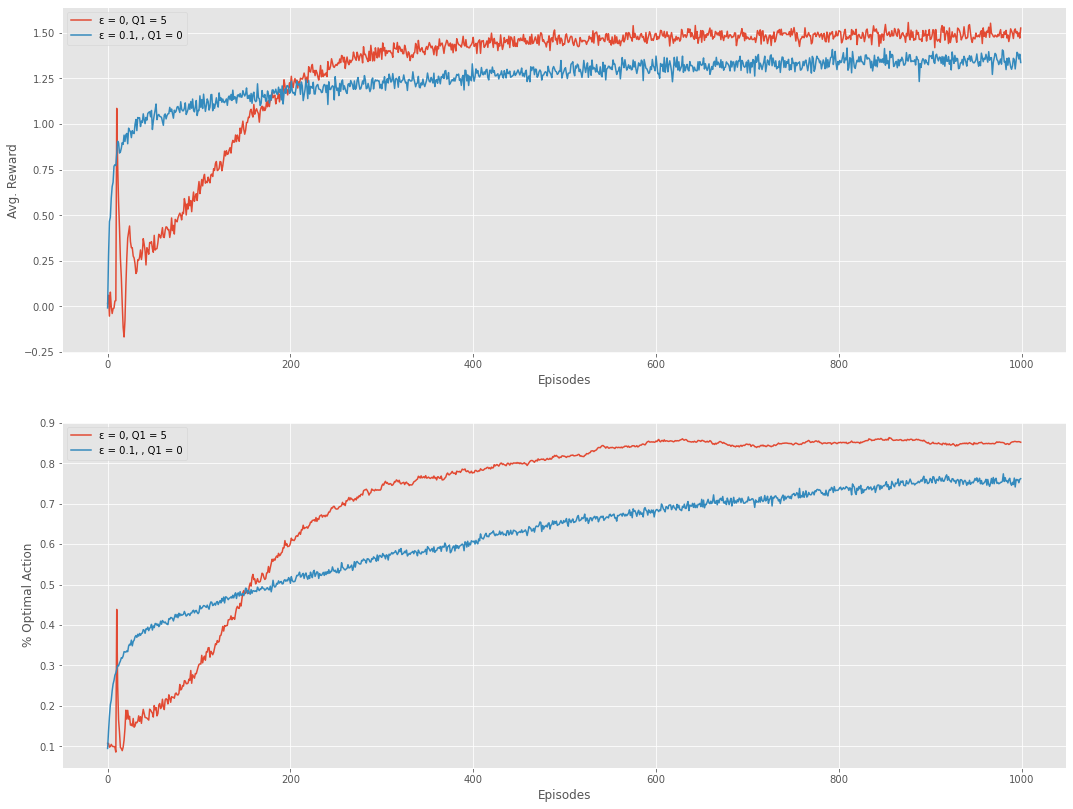

CPU times: user 3min 15s, sys: 731 ms, total: 3min 16s
Wall time: 3min 15s


In [7]:
%%time

# stationary, optimistic
bandits = {
    '\u03B5 = 0, Q1 = 5' : Bandit(sample_averages = False, optimistic = 5, alpha = 0.1),
    '\u03B5 = 0.1, , Q1 = 0' : Bandit(sample_averages = False, epsilon = 0.1, alpha = 0.1)
}

# run simulation
history = simulate_bandits(bandits, epochs = 2000, episodes = 1000)

# plot rewards
plot_bandits(history)

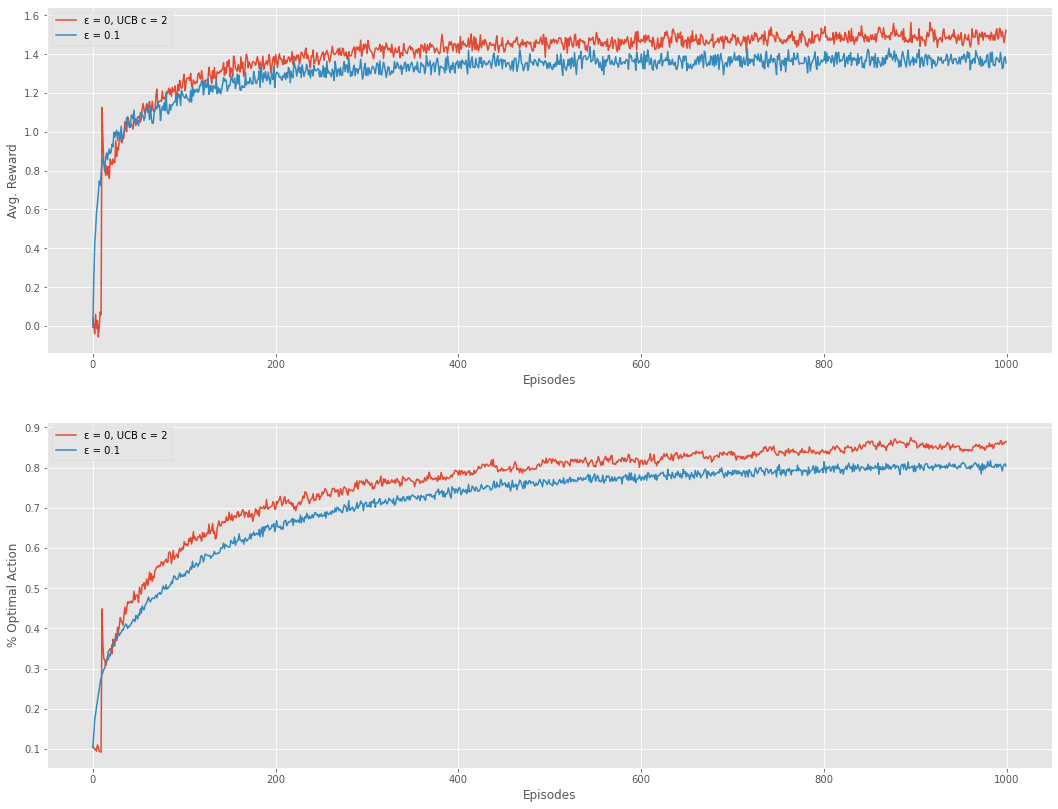

CPU times: user 3min 4s, sys: 450 ms, total: 3min 5s
Wall time: 3min 4s


In [8]:
%%time

# stationary, UCB
bandits = {
    '\u03B5 = 0, UCB c = 2' : Bandit(UCB = 2),
    '\u03B5 = 0.1' : Bandit(epsilon = 0.1)
}

# run simulation
history = simulate_bandits(bandits, epochs = 2000, episodes = 1000)

# plot rewards
plot_bandits(history)

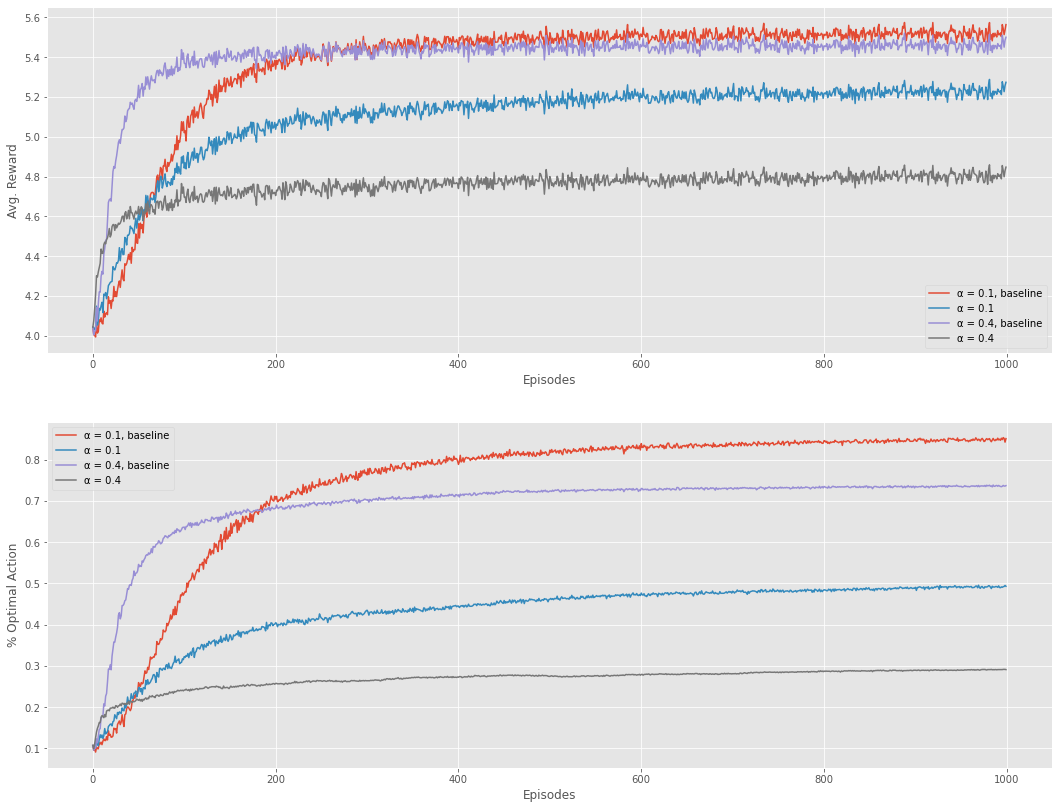

CPU times: user 7min 23s, sys: 3.4 s, total: 7min 27s
Wall time: 7min 25s


In [9]:
%%time

# stationary, gradient (w/ and w/o baseline)
bandits = {
    '\u03B1 = 0.1, baseline' : Bandit(sample_averages = False, gradient = True, gradient_baseline = True, alpha = 0.1, true_reward = 4),
    '\u03B1 = 0.1' : Bandit(sample_averages = False, gradient = True, alpha = 0.1, true_reward = 4),
    '\u03B1 = 0.4, baseline' : Bandit(sample_averages = False, gradient = True, gradient_baseline = True, alpha = 0.4, true_reward = 4),
    '\u03B1 = 0.4' : Bandit(sample_averages = False, gradient = True, alpha = 0.4, true_reward = 4)
}

# run simulation
history = simulate_bandits(bandits, epochs = 2000, episodes = 1000)

# plot rewards
plot_bandits(history)